# Exercise 1: Sampling

In [1]:
from random import uniform
import math
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [2]:
def compare_random_functions(custom_random_function, mu = 5.0, sigma = 2.0, number_of_samples = 1e6):
    
    number_of_samples = int(number_of_samples)
    tic = timeit.default_timer()
    np_samples = np.random.normal(loc=mu, scale = sigma, size = number_of_samples)
    toc = timeit.default_timer()
    numpy_time =  (toc - tic) / number_of_samples * 1e6
    
    tic = timeit.default_timer()
    function_samples = [custom_random_function(mu, sigma) for _ in range(number_of_samples)]
    toc = timeit.default_timer()
    custom_time =  (toc - tic) / number_of_samples * 1e6
    
    nbins = 100
    plt.figure(figsize=(15,8))
    plt.subplot(121)
    plt.hist(np_samples, bins= nbins)
    plt.title(f'numpy random function ({numpy_time})')
    plt.subplot(122)
    plt.hist(function_samples, bins= nbins)
    plt.title(f'{custom_random_function.__name__} random function ({custom_time})')
    plt.show()

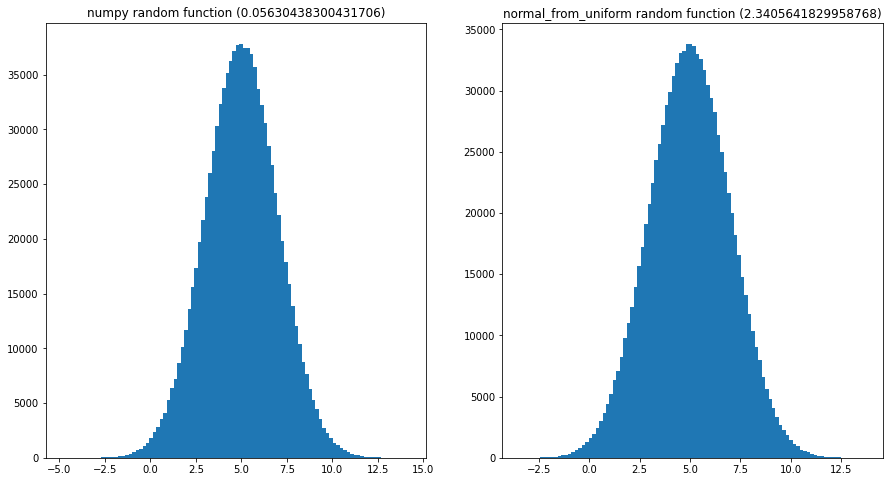

In [3]:
def normal_from_uniform(mu, sigma):
    return (0.5 * sum([uniform(-sigma, sigma) for _ in range(12)])) + mu

compare_random_functions(normal_from_uniform)

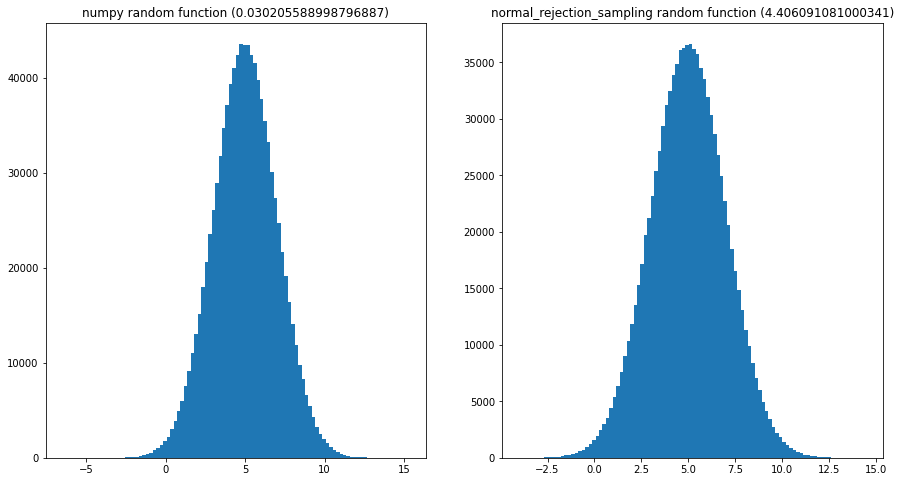

In [4]:
def normal_rejection_sampling(mu, sigma):
    def normal_equation(x):
        return math.exp(-0.5* ((x-mu)**2)/(sigma**2) )  / (sigma * math.sqrt(2.0 * math.pi))
    
    while True:
        randx = uniform(mu - 5*sigma , mu + 5*sigma)
        randy = uniform(0, normal_equation(mu))
        if randy <= normal_equation(randx):
            return randx

compare_random_functions(normal_rejection_sampling)

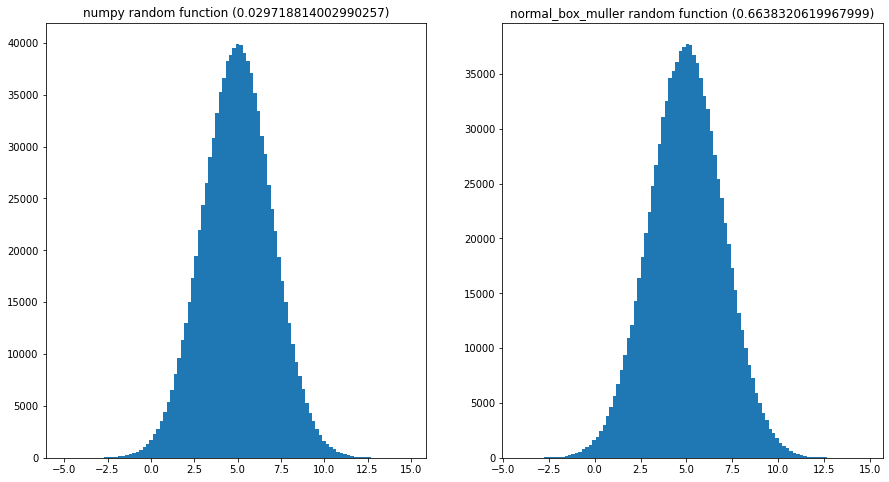

In [5]:
def normal_box_muller(mu, sigma):
    u1 = uniform(0.0,1.0)
    u2 = uniform(0.0,1.0)
    return math.cos(2.0*math.pi* u1)*math.sqrt(-2.0 * math.log(u2)) * sigma + mu

compare_random_functions(normal_box_muller)

# Exercise 2: Sampling